In [1]:
import numpy as np                  #импорт
import pandas as pd                 #необходимых
import matplotlib.pyplot as plt     #библиотек

## Визуализация датасета

In [8]:
df = pd.read_csv('WineDataset.csv')
print(df)
df.info()
df.describe()

     Alcohol  Malic Acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyan

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Wine
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


array([[<Axes: title={'center': 'Alcohol'}>,
        <Axes: title={'center': 'Malic Acid'}>,
        <Axes: title={'center': 'Ash'}>,
        <Axes: title={'center': 'Alcalinity of ash'}>],
       [<Axes: title={'center': 'Magnesium'}>,
        <Axes: title={'center': 'Total phenols'}>,
        <Axes: title={'center': 'Flavanoids'}>,
        <Axes: title={'center': 'Nonflavanoid phenols'}>],
       [<Axes: title={'center': 'Proanthocyanins'}>,
        <Axes: title={'center': 'Color intensity'}>,
        <Axes: title={'center': 'Hue'}>,
        <Axes: title={'center': 'OD280/OD315 of diluted wines'}>],
       [<Axes: title={'center': 'Proline'}>,
        <Axes: title={'center': 'Wine'}>, <Axes: >, <Axes: >]],
      dtype=object)

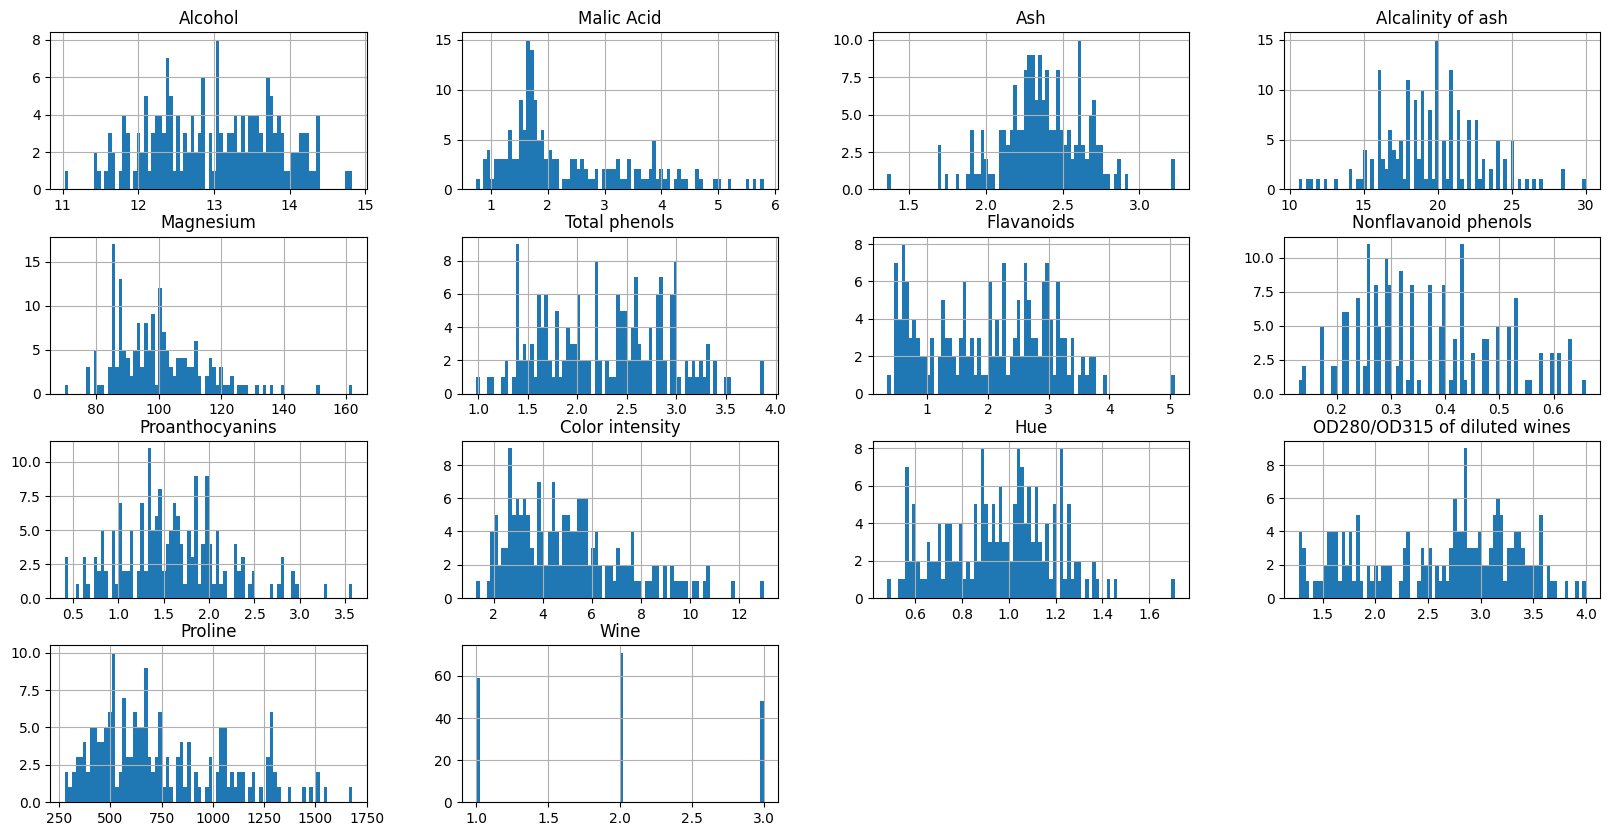

In [10]:
df.hist(bins=80, figsize=(20, 10))

## Train Test Split

In [28]:
train = df.sample(frac=0.8, random_state=336771)
test = df.drop(train.index)

X_train = train.drop('Wine', axis=1)
Y_train = train['Wine']

X_test = test.drop('Wine', axis=1)
Y_test = test['Wine']

## Нормализация

In [29]:
for col in X_train.columns:
    minimum = X_train[col].min()
    maximum = X_train[col].max()
    X_train[col] = (X_train[col] - minimum) / (maximum - minimum)
    X_test[col] = (X_test[col] - minimum) / (maximum - minimum)
X_train.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,0.466786,0.313046,0.535023,0.456766,0.273223,0.448252,0.358501,0.421452,0.368663,0.360076,0.492421,0.488934,0.336049
std,0.226805,0.228064,0.152706,0.172258,0.172238,0.214049,0.207867,0.233453,0.176099,0.215442,0.227112,0.266297,0.226258
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280702,0.165020,0.454545,0.331186,0.133929,0.280172,0.187236,0.250000,0.264984,0.182426,0.322165,0.213370,0.158345
50%,0.479532,0.211462,0.534759,0.432990,0.238095,0.443103,0.375527,0.346154,0.358044,0.325692,0.510309,0.558608,0.284237
75%,0.658626,0.462945,0.640374,0.561856,0.375000,0.623276,0.513713,0.557692,0.474763,0.478271,0.659794,0.692308,0.506954
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
X_test.describe()

,Alcohol,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,0.458415,0.325099,0.550951,0.465349,0.202050,0.474138,0.348043,0.447115,0.387750,0.363897,0.491409,0.501425,0.328123
std,0.278691,0.191951,0.121221,0.173952,0.150113,0.224514,0.224530,0.263774,0.199084,0.246861,0.270208,0.237142,0.221028
min,-0.111111,0.065217,0.331551,0.041237,-0.095238,0.144828,0.033755,-0.019231,0.044164,0.043935,0.061856,0.087912,0.008559
25%,0.241959,0.183794,0.471925,0.375000,0.104167,0.238793,0.098101,0.206731,0.260252,0.187202,0.275773,0.284799,0.171719
50%,0.453216,0.304348,0.521390,0.484536,0.160714,0.506897,0.382911,0.490385,0.381703,0.321872,0.458763,0.549451,0.272468
75%,0.687865,0.449111,0.627005,0.561856,0.285714,0.651724,0.561181,0.649038,0.500000,0.429322,0.667526,0.707875,0.438837
max,0.976608,0.764822,0.834225,0.793814,0.595238,0.875862,0.719409,0.903846,0.788644,1.119389,1.268041,0.868132,0.878745


## KNN методы

In [43]:
def training(x, y, col_names): return np.array(x[col_names]), np.array(y)

def pred(x, k, x_self, y_self, col_names):
    x = np.array(x[col_names])
    ans = []
    for row in x:
        tmp = np.linalg.norm(x_self - row, axis=1)
        k_ids = tmp.argsort()[:k]
        k_classes = y_self[k_ids]
        classes, counts = np.unique(k_classes, return_counts=True)
        winner = counts.argsort()[0]
        ans.append(classes[winner])
    return np.array(ans)

# Матрица ошибок

In [53]:
def matrix(ax, pred_y, true_y, n):
    res = np.zeros((n, n))
    for pred, true in zip(pred_y, true_y): res[int(pred), true] += 1
    ax.matshow(res)
    ax.set_xlabel('True class')
    ax.set_ylabel('Predicted class')
    for (i, j), z in np.ndenumerate(res):
        ax.text(j, i, str(int(z)), ha='center', va='center')

## Модели

### Случайный выбор признаков

Столбцы:
Hue, Total phenols, Proanthocyanins, OD280/OD315 of diluted wines, Nonflavanoid phenols


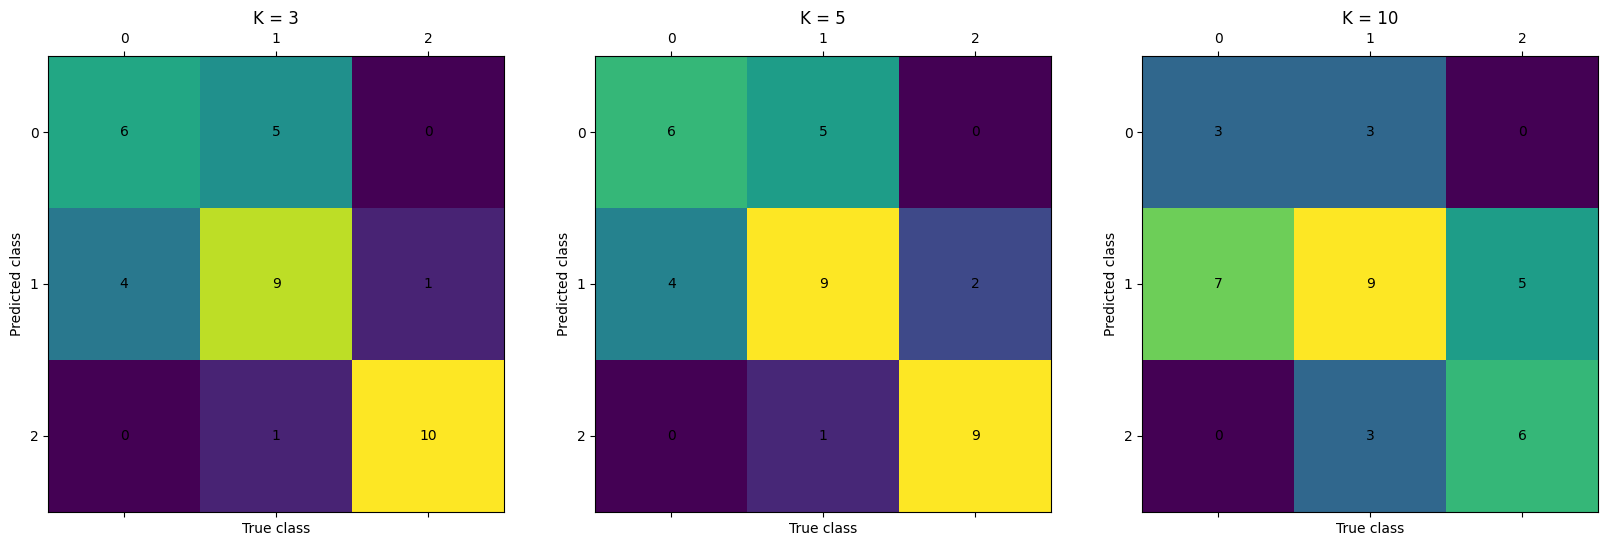

In [59]:
col_names = np.random.choice(X_train.columns, size=np.random.randint(1, len(X_train.columns)), replace=False)
print('Столбцы:')
print(*col_names, sep=', ')

plt.figure(figsize=(20, 6))
for i, k in enumerate([3, 5, 10], 1):
    X, Y = training(X_train, Y_train, col_names)
    ax = plt.subplot(1, 3, i)
    ax.set_title('K = %d' %k)
    matrix(ax, pred(X_test, k, X, Y, col_names)-1, Y_test-1, 3)

### Фиксированый набор признаков

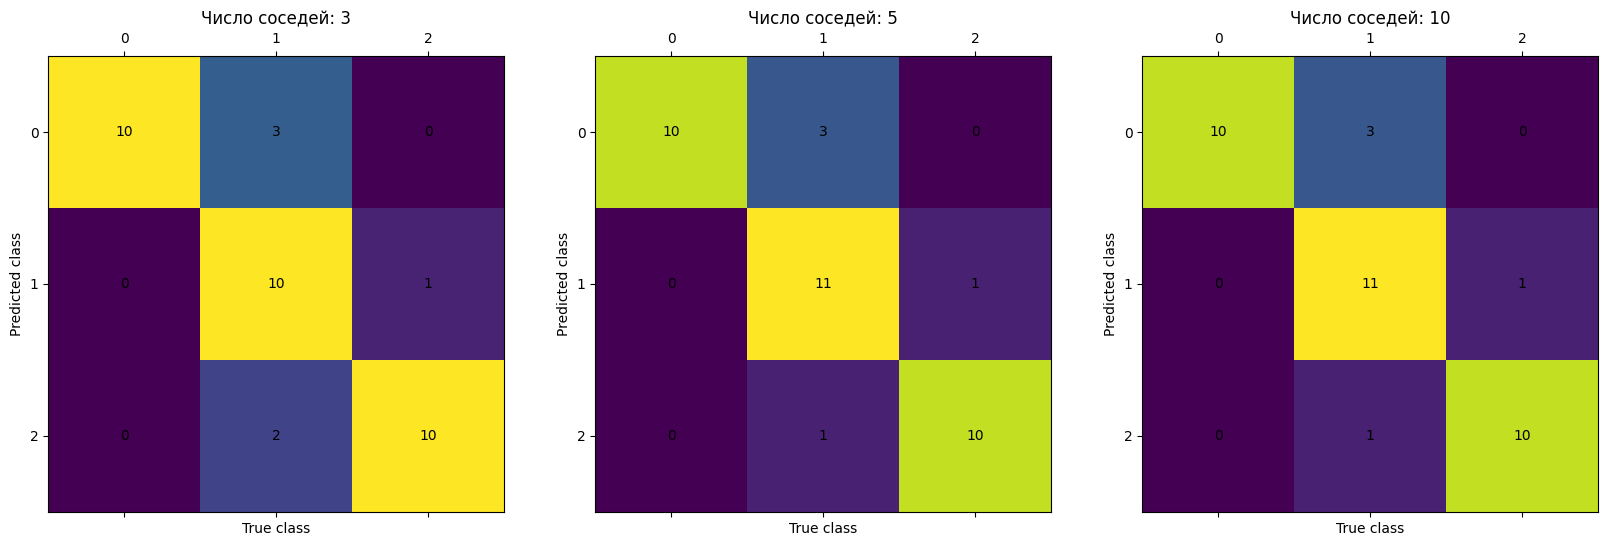

In [63]:
plt.figure(figsize=(20, 6))
for i, k in enumerate([3, 5, 10], 1):
    X, Y = training(X_train, Y_train, X_train.columns)
    ax = plt.subplot(1, 3, i)
    ax.set_title('Число соседей: %d' %k)
    matrix(ax, pred(X_test, k, X, Y, X_train.columns)-1, Y_test-1, 3)